In [2]:
import pandas as pd 
import seaborn as sns 
pd.set_option('display.float_format', '{:,.2f}'.format)


In [3]:
df = pd.read_csv("./FAO.csv")


## Spulciamo alcune info dal nostro DATAFRAME

In [4]:
df.sample(3)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
3152,TA,Live animals,16,Bangladesh,5622,Import Value,1140,Rabbits and hares,2017,2017,1000 US$,5.00,*,Unofficial figure
25522,TA,Live animals,256,Luxembourg,5922,Export Value,1157,"Camelids, other",2010,2010,1000 US$,0.00,F,FAO estimate
24649,TA,Live animals,122,Lesotho,5622,Import Value,1171,Animals live nes,2016,2016,1000 US$,69.00,R,Estimated data using trading partners database


In [5]:
df.describe()

,Area Code,Element Code,Item Code,Year Code,Year,Value
count,"47,780.00","47,780.00","47,780.00","47,780.00","47,780.00","44,440.00"
mean,132.72,"5,744.66","1,053.36","2,012.96","2,012.96","34,889.01"
std,77.43,148.72,87.00,2.23,2.23,"344,940.24"
min,1.00,"5,607.00",866.00,"2,010.00","2,010.00",0.00
25%,67.00,"5,609.00","1,016.00","2,011.00","2,011.00",0.00
50%,130.00,"5,622.00","1,068.00","2,013.00","2,013.00",46.00
75%,199.00,"5,909.00","1,110.00","2,015.00","2,015.00","1,585.00"
max,351.00,"5,922.00","1,181.00","2,017.00","2,017.00","15,542,605.00"


In [6]:
df['Item'].unique()

array(['Animals live nes', 'Animals, live, non-food', 'Buffaloes',
       'Camels', 'Cattle', 'Chickens', 'Ducks', 'Goats', 'Horses', 'Pigs',
       'Sheep', 'Turkeys', 'Asses', 'Beehives', 'Mules',
       'Camelids, other', 'Rabbits and hares', 'Rodents, other'],
      dtype=object)

<AxesSubplot:>

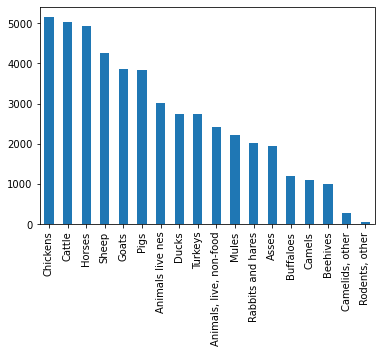

In [7]:
counts = df['Item'].value_counts()
counts.plot.bar()

## Usiamo tabella pivot, strumento potente e versatile

In [8]:
pivot = df.pivot_table(index=["Area", "Year"], columns=["Element"], values="Value")
# TODO Rivedere bene tabelle pivot con PANDAS

In [9]:
pivot

Element           Export Quantity  Export Value  Import Quantity  Import Value
Area        Year                                                              
Afghanistan 2010             0.00          0.00         1,474.67      1,191.00
            2011             0.00          0.00         1,594.00      2,142.00
            2012             0.00          0.00         2,817.67      1,474.00
            2013             0.00          0.00        30,923.33      7,942.33
            2014           565.00        182.25        20,224.20      5,769.00
...                           ...           ...              ...           ...
Zimbabwe    2013            94.91        166.77           710.60        550.45
            2014           513.00        742.50         1,495.67        967.57
            2015           758.33        973.00           921.50      1,180.43
            2016           227.00        614.00           452.86        639.38
            2017           142.67        557.75           537.71        444.50

[1634 rows x 4 columns]

In [10]:
pivot.to_excel('pivot.xlsx')

In [11]:
chicken_filter = df['Item'] == 'Chickens' # Series di valori booleani

In [12]:
chickens = df[chicken_filter]

## Costruiamo una colonna per valori non confrontabili
Ci sono alcuni animali in cui i valori sono espressi in migliaia di capi ed altri in migliaia di dollari.

In [13]:
chickens['Unit'].value_counts()

1000 Head    2576
1000 US$     2576
Name: Unit, dtype: int64

In [14]:
chickens['Value_Extended'] = chickens['Value'] * 1000
# ora capi e dollari sono rappresentati dal numero naturale!

/tmp/ipykernel_45750/2807612244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chickens['Value_Extended'] = chickens['Value'] * 1000


In [15]:
chickens.loc[chickens.Unit == '1000 Head', 'Unit'] = 'Head'
chickens.loc[chickens.Unit == '1000 US$', 'Unit'] = 'Dollars'

In [16]:
chick_ita = chickens[chickens.Area == 'Italy']


<AxesSubplot:xlabel='Year', ylabel='Value_Extended'>

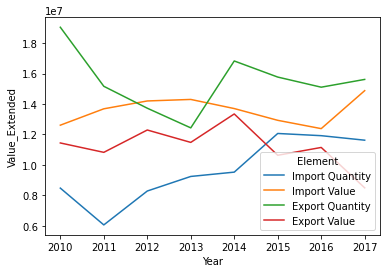

In [17]:
sns.lineplot(data=chick_ita, x='Year', y='Value_Extended', hue='Element')

In [18]:
chickens.to_csv("chickens.csv")